# Mean-Shift Clustering

In [3]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler 
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Open Dataframes from File

In [13]:
# load resource_priority_df from a file
with open('resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load player_df from a file (contains lane info)
with open('player_df.pickle', 'rb') as f:
    player_df = pickle.load(f)
    

## Function for visualizing counts

In [6]:
def show_cluster_counts(dataframe, graph_name):
    role_counts = np.bincount(dataframe)

    plt.bar(range(len(role_counts)), role_counts)

    plt.xlabel('Role')
    plt.ylabel('Count')
    plt.title(graph_name)

    plt.show()

## Mean Shift -- Resource Prioritization

[3 1 1 2 0 2 1 0 3 2 1 2 0 0 5 4 1 1 0 0 0 3 2 1 1 4 1 1 2 0 1 3 1 2 0 0 2
 3 3 1 1 0 1 2 1 1 0 4 0 2 4 1 1 2 0 1 3 0 0 4 1 0 2 0 5 1 1 4 0 0 1 1 0 0
 4 3 1 1 0 0 0 4 3 0 1 0 3 1 2 1 3 2 0 0 1 1 1 1 2 0 4 1 2 2 0 4 2 0 3 2 2
 1 0 4 0 1 4 1 0 0 2 0 3 3 2 2 4 1 2 0 5 0 1 0 0 1 4 3 0 0 3 1 0 2 2 0 3 1
 0 3 0 2 1 2 3 3 1 2 0 0 0 2 1 4 2 0 1 1 0 3 3 1 3 2 0 0 5 0 1 2 1 3 2 2 2
 0 1 2 4 0 2 1 1 0 3 1 1 0 0 4 2 2 4 1 0 0 3 1 0 1 0 4 1 0 1 0 0 3 3 2 0 1
 2 1 3 1 0 1 1 2 2 2 4 0 2 0 1 1 3 2 2 0 1 1 3 2 1 3 2 0 3 0 2 3 0 0 1 0 1
 4 1 1 3 1 0 0 2 3 2 1 1 4 2 0 2 2 4 1 0 2 2 1 1 2 1 2 3 1 2 2 0 0 1 4 1 1
 3 1 2 0 0 4 1 0 1 0 1 2 1 3 0 2 2 4 2 0 1 1 0 1 2 1 1 1 2 0 3 2 0 3 2 4 4
 0 0 1 1 2 2 2 3 3 2 0 2 0 3 3 0 1 4 1 2 0 2 3 1 3 0 0 2 3 1 0 1 2 4 2 2 0
 4 1 0 1 0 0 1 0 4 1 0 0 1 1 4 2 3 0 1 3 2 0 5 3 0 2 4 2 2 1 1 0 2 4 2 1 3
 0 1 0 2 4 1 2 0 0 4 1 0 1 0 2 3 1 1 2 2 1 3 0 1 4 1 2 0 3 1 0 2 3 4 2 1 2
 2 0 1 4 1 0 1 4 0 0 1 1 2 2 0 4 4 0 0 1 2 3 1 0 0 3 2 1 1 2 1 3 3 2 2 0 0
 4 1 0 1 4 1 2 0 0 1 1 4 

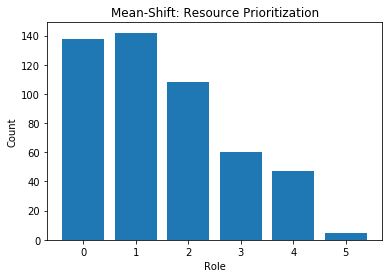

In [7]:
scale = StandardScaler()
scaled_df_rp = scale.fit_transform(resource_priority_df[['xpm_priority', 'gold_priority']][:500])

meanshift_rp = MeanShift(bandwidth=0.5)

meanshift_rp.fit(scaled_df_rp)

target_hero_roles_rp = meanshift_rp.predict(scaled_df_rp)

print(target_hero_roles_rp) 

show_cluster_counts(target_hero_roles_rp, "Mean-Shift: Resource Prioritization")

## Mean Shift -- Ability Prioritization

[0 0 0 0 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0]


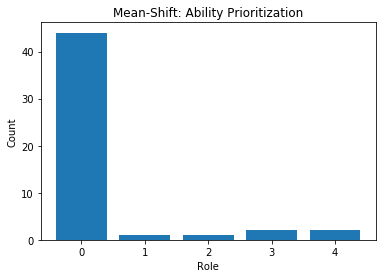

In [21]:
scale = StandardScaler()
scaled_df_ap = scale.fit_transform(ability_priority_df[['A1', 'A2', 'A3', 'A4']][:500])

meanshift_ap = MeanShift(bandwidth=2)

meanshift_ap.fit(scaled_df_ap)

target_hero_roles_ap = meanshift_ap.predict(scaled_df_ap)

print(target_hero_roles_ap) 

show_cluster_counts(target_hero_roles_ap, "Mean-Shift: Ability Prioritization")

## Mean Shift -- Initial Lane


[0 2 1 2 0 1 2 0 1 0 2 1 0 1 0 1 2 0 0 1 0 0 2 2 1 1 2 0 2 1 0 2 1 3 0 1 0
 2 1 0 2 0 0 1 1 2 0 1 1 0 0 2 1 1 1 2 0 1 1 3 2 1 1 0 0 2 0 1 0 1 2 1 0 1
 0 1 2 0 0 1 0 0 2 1 1 1 2 0 0 1 2 1 0 1 0 1 2 0 2 1 0 1 2 1 0 1 0 1 2 0 1
 2 1 0 0 0 1 2 0 1 1 1 2 0 0 0 1 2 0 1 0 1 2 0 1 0 1 2 0 1 0 2 0 2 1 3 0 2
 0 1 0 1 2 1 0 1 2 0 0 1 0 1 2 0 1 1 1 2 0 0 2 1 0 1 0 1 1 0 2 0 1 0 0 1 2
 0 0 2 1 1 1 1 2 0 0 1 2 1 2 0 1 1 0 2 0 0 1 0 1 2 0 0 2 1 1 1 0 2 1 0 0 2
 1 1 0 1 1 2 0 0 1 1 0 0 2 0 0 2 1 1 0 1 0 2 1 0 2 1 0 1 0 1 1 2 0 0 0 1 2
 1 0 1 0 2 1 1 0 1 0 2 2 0 1 0 1 1 1 2 0 0 0 0 1 1 2 1 1 2 0 0 0 1 2 0 1 0
 1 2 0 1 0 0 1 1 2 1 2 0 0 1 0 1 1 0 2 1 1 2 0 0 0 0 2 1 1 1 1 0 0 2 0 0 2
 1 1 2 1 0 1 0 0 2 1 0 1 0 2 1 1 0 0 2 1 0 1 0 2 1 1 0 1 2 1 0 0 0 2 0 1 1
 0 2 0 1 1 0 2 1 1 0 1 0 2 1 0 1 2 0 0 1 1 0 0 2 2 1 1 0 0 2 2 0 1 0 1 1 2
 1 0 0 1 0 2 2 0 1 1 0 0 2 0 1 0 1 2 1 2 0 0 1 2 0 1 1 0 2 0 0 1 1 2 1 0 1
 0 0 2 1 0 1 1 0 1 0 2 0 2 0 1 1 0 0 1 2 1 1 0 1 0 2 0 2 1 1 0 2 1 0 1 0 0
 0 1 1 2 1 2 0 1 0 0 2 1 

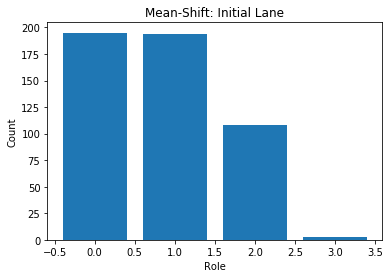

In [12]:
scale = StandardScaler()
scaled_df_lane = scale.fit_transform(player_df[['lane']][:500])

meanshift_lane = MeanShift(bandwidth=0.8)

meanshift_lane.fit(scaled_df_lane)

target_hero_roles_lane = meanshift_lane.predict(scaled_df_lane)

print(target_hero_roles_lane) 

show_cluster_counts(target_hero_roles_lane, "Mean-Shift: Initial Lane")